### Resizing Images
When we are formatting images to be inputted to a Keras model, we must specify the input dimensions. Many academic datasets like CIFAR-10 or MNIST are all conveniently the same size, (32x32x3 and 28x28x1 respectively). However, in the spider dataset which consists of crawed images, we have many different sizes of images. First, we will write some code to loop through the images and gather some descriptive statistics on the maximum, mean, and minimum height and width of the spider images.

In [48]:
from PIL import Image # used for loading images
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images
from random import shuffle
from matplotlib import pyplot as plt
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten

In [2]:
def get_size_statistics(DIR):
    
    heights = []
    widths = []
    
    for img in os.listdir(DIR): 
        path = os.path.join(DIR, img)
        data = np.array(Image.open(path)) 
        heights.append(data.shape[0])
        widths.append(data.shape[1])
    
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

In [10]:
get_size_statistics("C:/Users/Donghan Yang/Desktop/poisonous-spider-recognition/all")

Average Height: 636.6305732484077
Max Height: 5184
Min Height: 90


Average Width: 812.8407643312102
Max Width: 5184
Min Width: 120


In [21]:
def label_img(name):
    word_label = name.split(' ')[0]
    if word_label == 'Redback': 
        return np.array([1, 0, 0, 0, 0])
    elif word_label == 'white_tailed': 
        return np.array([0, 1, 0, 0, 0])
    elif word_label == 'Garden_Orb_Weaver':
        return np.array([0, 0, 1, 0, 0])
    elif word_label == 'Tarantula':
        return np.array([0, 0, 0, 1, 0])
    elif word_label == 'funnel_web':
        return np.array([0, 0, 0, 0, 1])

In [53]:
IMG_SIZE = 600

def load_training_data(DIR):
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        img = Image.open(path)
        img = img.convert('RGB')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
        
        # Basic Data Augmentation - Horizontal Flipping
        flip_img = Image.open(path)
        flip_img = flip_img.convert('RGB')
        flip_img = flip_img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        flip_img = np.array(flip_img)
        flip_img = np.fliplr(flip_img)
        train_data.append([flip_img, label])
    
    shuffle(train_data)
    return train_data

In [54]:
train_data = load_training_data("C:/Users/Donghan Yang/Desktop/poisonous-spider-recognition/train")

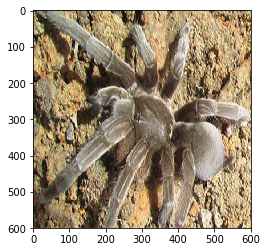

In [60]:
plt.imshow(train_data[30][0])

### CNN Demo

In [64]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
trainLabels = np.array([i[1] for i in train_data])

In [68]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(5, activation = 'softmax'))

In [69]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [70]:
model.fit(trainImages, trainLabels, batch_size=50, epochs=20, verbose=1)

Epoch 1/20
702/702 [==============================] - 235s 334ms/step - loss: 0.7909 - acc: 0.7501
Epoch 2/20
702/702 [==============================] - 188s 267ms/step - loss: 0.5032 - acc: 0.8197
Epoch 3/20
702/702 [==============================] - 186s 266ms/step - loss: 0.2890 - acc: 0.8875
Epoch 4/20
702/702 [==============================] - 187s 266ms/step - loss: 0.2223 - acc: 0.9151
Epoch 5/20
702/702 [==============================] - 171s 243ms/step - loss: 0.1746 - acc: 0.9370
Epoch 6/20
702/702 [==============================] - 163s 233ms/step - loss: 0.2216 - acc: 0.9137
Epoch 7/20
702/702 [==============================] - 190s 271ms/step - loss: 0.1813 - acc: 0.9373
Epoch 8/20
702/702 [==============================] - 177s 252ms/step - loss: 0.2665 - acc: 0.9211
Epoch 9/20
702/702 [==============================] - 171s 244ms/step - loss: 0.1870 - acc: 0.9425
Epoch 10/20
702/702 [==============================] - 176s 251ms/step - loss: 0.1473 - acc: 0.9490
Epoch 11/

In [71]:
model.save('sample_cnn.h5')

In [83]:
TEST_DIR = "C:/Users/Donghan Yang/Desktop/poisonous-spider-recognition/dev"

def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        try:
            img = Image.open(path)
            img = img.convert('RGB')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
        except:
            continue
        
        # Basic Data Augmentation - Horizontal Flipping
        flip_img = Image.open(path)
        flip_img = flip_img.convert('RGB')
        flip_img = flip_img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        flip_img = np.array(flip_img)
        flip_img = np.fliplr(flip_img)
        test_data.append([flip_img, label])
    
    shuffle(test_data)
    return test_data

In [84]:
test_data = load_test_data()

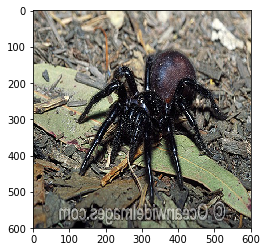

In [86]:
plt.imshow(test_data[30][0])

In [90]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

79.46666661898296
